In [1]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip

--2020-04-28 10:44:12--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip’

data_MNIST.zip      100%[===================>] 614.89K  --.-KB/s    in 0.1s    

2020-04-28 10:44:13 (6.20 MB/s) - ‘data_MNIST.zip’ saved [629644/629644]



In [2]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


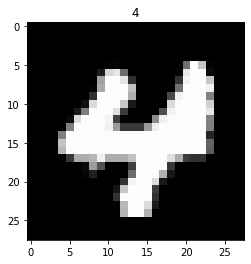

In [3]:
# Plot imagine
import numpy as np
import matplotlib.pyplot as plt
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'float').astype(np.int)

 # tipul de date int
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.title(train_labels[0])
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [4]:
image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

(array([ 91., 120.,  96.,  99., 105.,  83.,  98., 104., 101., 103.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

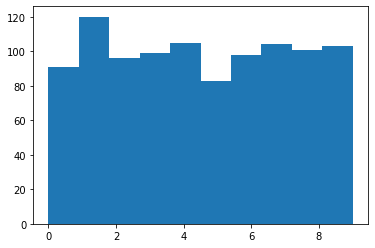

In [5]:
plt.hist(train_labels)

In [7]:
# 2. Știind că valoarea minimă a unui pixel este 0, iar valoarea maximă este 255,
# calculați capetele a num_bins intervale (utilizați funcția linspace). Definiți
# metoda values_to_bins care primește o matrice de dimensiune (n_samples,
# n_features) și capetele intervalelor calculate anterior, iar pentru fiecare 
# exemplu și fiecare atribut calculează indexul intervalului corespunzător
# (utilizați funcția np.digitize).
# Folosiți funcția definită pentru a discretiza mulțimea de antrenare și cea de
# testare.

train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt','float').astype(np.int)
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'float').astype(np.int)

def values_to_bins (data_matrix, num_bins):
    bins = np.linspace(start = 0, stop = 255, num = num_bins)
    return np.digitize(data_matrix, bins) - 1

x_train = values_to_bins(train_images, 5)
x_test = values_to_bins(test_images, 5)

x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(array([[1000.,    0.,    0., ...,    0.,    0.,    0.],
        [1000.,    0.,    0., ...,    0.,    0.,    0.],
        [1000.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [1000.,    0.,    0., ...,    0.,    0.,    0.],
        [1000.,    0.,    0., ...,    0.,    0.,    0.],
        [1000.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 784 Lists of Patches objects>)

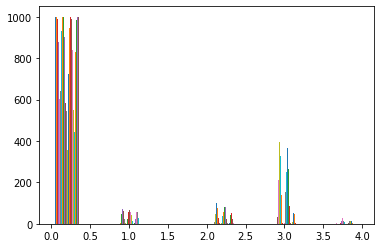

In [9]:
# Pentru a observa mai bine valorile
plt.hist(x_train)

In [10]:
# 3. Calculați acuratețea pe mulțimea de testare a clasificatorul Multinomial Naive
# Bayes, împărținând intervalul pixelilor în 5 sub-intervale

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train, train_labels)
print(clf.score(x_test, test_labels))
print(clf.predict(x_test))

0.836
[2 7 3 1 2 2 0 8 1 4 7 3 2 0 8 3 8 9 9 1 8 2 0 0 5 9 6 2 6 7 3 2 4 9 6 6 1
 7 5 3 0 1 8 2 2 1 3 7 9 6 7 6 7 7 9 7 3 1 2 1 7 8 0 8 8 3 1 6 0 5 8 8 6 3
 2 4 4 0 9 1 9 4 3 3 1 4 0 5 7 9 0 5 2 3 4 4 4 9 5 0 0 6 8 4 6 0 7 0 8 8 7
 9 3 0 5 9 5 3 5 7 3 9 9 4 8 9 3 0 8 1 0 9 2 6 6 3 7 0 2 8 7 0 4 2 1 3 1 3
 5 3 9 3 0 0 3 6 3 2 0 1 6 4 3 2 8 2 4 4 7 8 5 3 7 4 2 8 0 0 0 3 1 6 6 2 5
 2 9 2 6 3 5 2 7 0 0 3 7 8 6 7 8 7 0 5 3 2 8 2 4 7 8 9 4 9 8 0 7 6 3 9 2 5
 6 0 1 9 6 0 2 5 9 5 8 4 1 4 6 2 6 9 9 9 5 2 4 5 3 8 3 8 8 8 1 0 4 8 8 9 3
 4 4 8 9 0 1 7 7 4 5 0 1 3 7 5 6 9 2 1 2 8 9 6 8 4 6 9 0 5 3 3 5 6 6 5 8 2
 9 3 6 1 1 7 0 8 8 3 2 1 0 0 8 0 0 1 1 6 9 2 4 2 7 0 8 8 4 1 7 2 4 2 0 9 6
 1 3 9 9 0 0 4 6 7 1 0 1 3 2 5 5 3 2 9 1 6 6 8 9 4 1 3 9 0 5 4 3 4 1 3 1 2
 4 2 4 2 2 3 4 4 7 1 3 7 6 5 7 9 3 0 8 4 9 9 9 6 2 2 1 5 6 6 7 9 9 3 8 4 1
 1 3 5 5 6 5 9 0 0 9 2 2 9 2 7 3 9 7 2 0 9 7 0 3 1 7 8 4 2 2 7 3 3 2 9 3 2
 3 0 9 9 9 3 4 3 1 1 1 2 4 8 6 6 0 1 2 1 6 1 7 6 1 1 4 3 1 1 6 8 7 8 5 1 9
 8 6 7 3 3 0 6 0 3 

In [11]:
test_labels

array([2, 7, 3, 1, 2, 2, 0, 5, 1, 4, 7, 3, 2, 6, 8, 3, 8, 9, 9, 1, 8, 2,
       0, 0, 5, 4, 6, 2, 6, 7, 3, 2, 4, 7, 6, 6, 1, 7, 5, 2, 0, 1, 1, 2,
       2, 1, 3, 7, 9, 6, 7, 6, 7, 7, 3, 7, 3, 1, 2, 1, 7, 8, 0, 1, 8, 3,
       1, 6, 0, 5, 8, 6, 6, 3, 2, 9, 7, 0, 9, 1, 4, 4, 3, 5, 1, 4, 0, 5,
       7, 9, 0, 5, 2, 3, 4, 4, 4, 9, 5, 0, 0, 6, 8, 4, 6, 0, 7, 0, 8, 0,
       7, 5, 3, 0, 5, 7, 5, 3, 8, 7, 3, 9, 9, 4, 5, 9, 3, 0, 6, 1, 0, 9,
       2, 6, 6, 3, 7, 0, 2, 8, 7, 5, 4, 2, 1, 3, 6, 5, 5, 5, 4, 3, 0, 0,
       3, 6, 3, 2, 0, 1, 6, 4, 3, 2, 5, 3, 8, 4, 7, 8, 5, 5, 7, 4, 2, 8,
       0, 0, 0, 3, 1, 6, 6, 2, 5, 2, 9, 2, 2, 3, 5, 8, 7, 0, 0, 3, 7, 8,
       6, 7, 8, 7, 0, 5, 3, 2, 8, 2, 4, 7, 8, 4, 4, 4, 5, 2, 7, 6, 3, 9,
       2, 5, 6, 0, 1, 9, 6, 0, 2, 5, 9, 5, 8, 9, 1, 9, 6, 8, 6, 9, 4, 4,
       5, 2, 4, 5, 5, 8, 3, 8, 8, 8, 1, 0, 4, 8, 2, 9, 3, 4, 9, 5, 4, 0,
       1, 7, 7, 4, 5, 0, 1, 9, 7, 5, 0, 9, 2, 1, 2, 8, 9, 5, 8, 7, 6, 9,
       0, 5, 3, 3, 5, 6, 6, 5, 8, 2, 9, 3, 6, 1, 1,

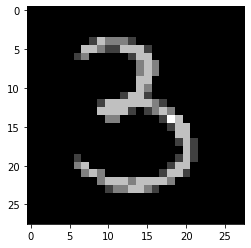

In [12]:
plt.imshow(x_test[2].reshape((28, 28)), cmap='gray')

In [14]:
# Acuratețea pe care trebuie să o obțineți pentru num_bins = 5 este de 83.6%.
(clf.predict(x_test) == test_labels).mean()

0.836

In [15]:
# 4. Testați clasificatorul Multinomial Naive Bayes pe subsetul MNIST folosind𝑛𝑢𝑚_𝑏𝑖𝑛𝑠 ∈ {3, 5, 7, 9, 11}.

from time import time

num_bins = [3, 5, 7, 9, 11]
for n in num_bins:
    
    train_to_bins = values_to_bins(train_images, n)
    test_to_bins = values_to_bins(test_images, n)

    start_time = time()
    NB = MultinomialNB()
    NB.fit(train_to_bins, train_labels)
    print(time() - start_time)
    print(NB.score(test_to_bins, test_labels))

0.01700615882873535
0.826
0.02334737777709961
0.836
0.02129197120666504
0.842
0.025016307830810547
0.842
0.021419048309326172
0.842


In [16]:
train_to_bins = values_to_bins(train_images, 7)
test_to_bins = values_to_bins(test_images, 7)

start_time = time()
NB = MultinomialNB()
NB.fit(train_to_bins, train_labels)
print(NB.score(test_to_bins, test_labels))


0.842


In [19]:
test_preds = NB.predict(test_to_bins)

print(test_preds.reshape(-1, 1).shape)

(500, 1)


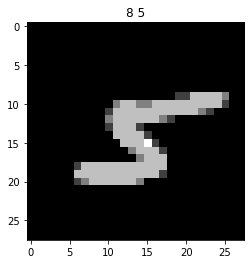

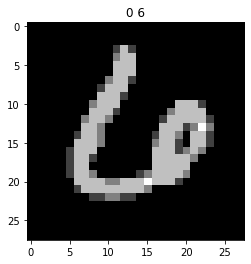

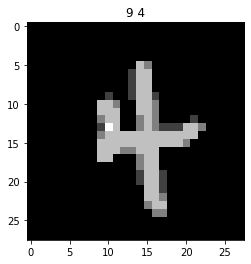

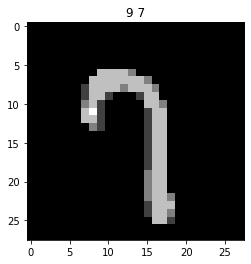

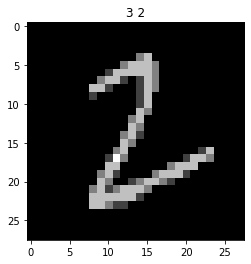

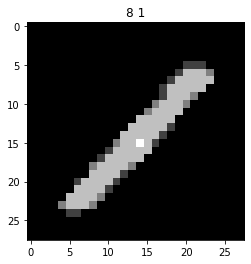

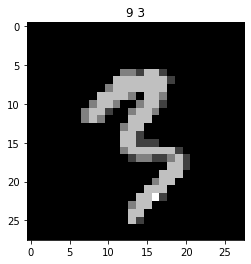

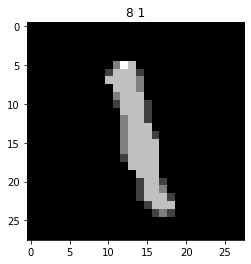

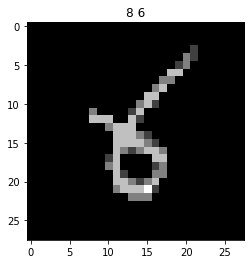

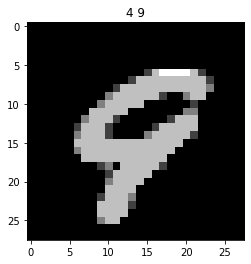

In [20]:
# 5. Folosind numărul de sub-intervale care obține cea mai bună acuratețe la
# exercițiul anterior, afișați cel puțin 10 exemple misclasate.

c = 10
for i in range(len(test_labels)):
    if test_labels[i] == test_preds[i]:
        continue
    plt.title(str(test_preds[i]) + ' ' + str(test_labels[i]))
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.show()
    c -= 1
    if c == 0:
        break

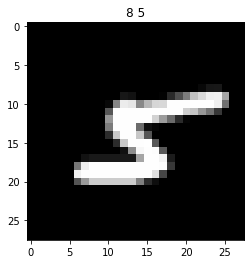

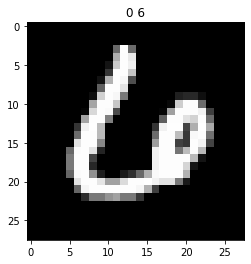

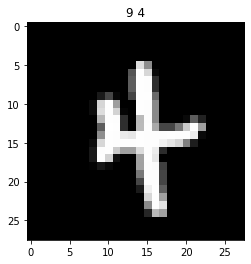

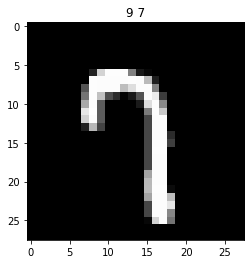

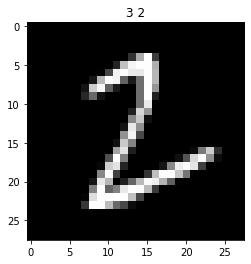

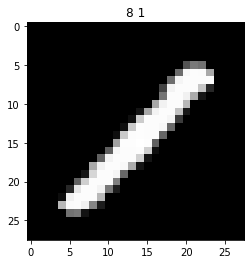

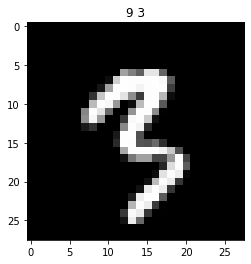

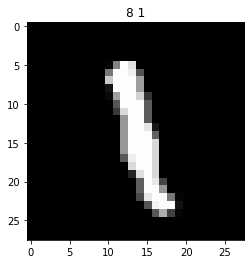

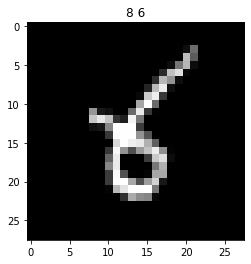

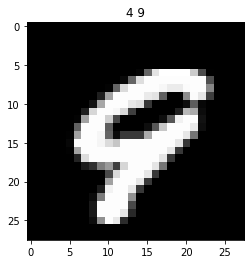

In [21]:
indexes = (clf.predict(x_test) == test_labels) == 0
miss_img = test_images[indexes]
miss_pred = test_preds[indexes]
miss_labels = test_labels[indexes]

# print(miss_pred)
# print(miss_labels)

for i in range(10):
    plt.title(str(miss_pred[i]) + ' ' + str(miss_labels[i]))
    plt.imshow(miss_img[i].reshape((28, 28)), cmap='gray')
    plt.show()

[  7  13  25  33  39  42  54  63  71  75  76  80  83 109 111 115 118 124
 128 141 146 147 149 150 164 165 166 171 188 191 211 213 214 215 233 235
 237 240 241 246 256 260 261 262 271 274 281 283 304 306 326 331 334 335
 336 343 354 360 365 367 372 377 384 385 386 404 406 416 423 430 433 439
 443 446 448 454 457 463 489 492 493 496]


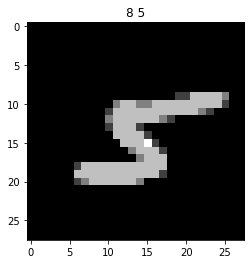

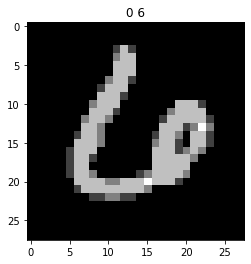

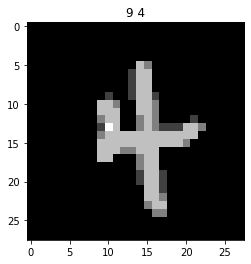

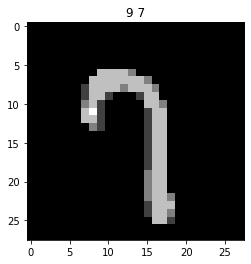

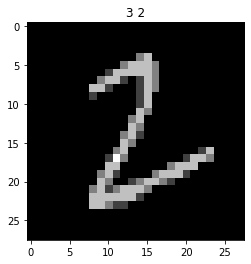

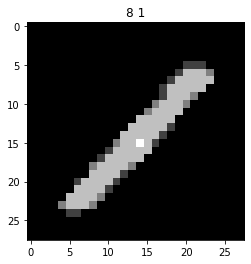

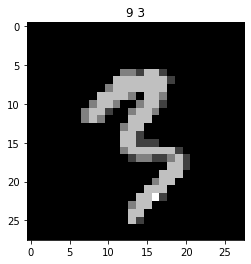

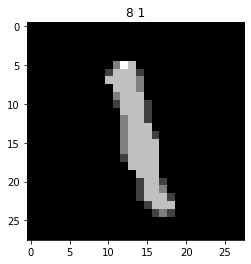

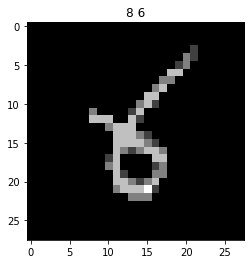

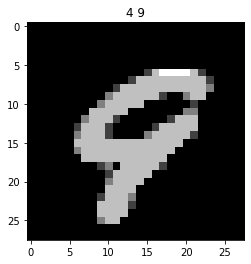

In [22]:
indexes = np.argwhere(clf.predict(x_test) != test_labels).reshape(-1)
print(indexes)
for i in indexes[:10]:
    plt.title(str(test_preds[i]) + ' ' + str(test_labels[i]))
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.show()

In [23]:
# 6. Definiți metoda confusion_matrix(y_true, y_pred) care calculează matricea de
# confuzie. Calculați matricea de confuzie folosind predicțiile clasificatorului anterior.

def confusion_matrix(y_true, y_pred, c=10):
    result = np.zeros((c, c)).astype(np.int)


    for p, t in zip(y_pred, y_true):
        result[t, p] += 1


    return result

print(confusion_matrix(test_labels, test_preds))

[[51  0  0  0  0  0  1  0  1  0]
 [ 0 48  0  0  0  0  0  0  4  0]
 [ 2  0 51  1  1  0  1  1  1  0]
 [ 0  0  1 49  0  0  0  0  0  3]
 [ 0  0  0  0 34  0  0  0  2 10]
 [ 1  0  0  9  0 35  1  0  5  1]
 [ 1  1  0  0  1  0 43  0  2  0]
 [ 0  1  0  0  2  0  0 41  0  6]
 [ 0  1  3  3  1  1  1  1 34  1]
 [ 0  0  1  1  5  0  0  0  0 35]]


In [25]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(test_labels, test_preds)
print(conf)

[[51  0  0  0  0  0  1  0  1  0]
 [ 0 48  0  0  0  0  0  0  4  0]
 [ 2  0 51  1  1  0  1  1  1  0]
 [ 0  0  1 49  0  0  0  0  0  3]
 [ 0  0  0  0 34  0  0  0  2 10]
 [ 1  0  0  9  0 35  1  0  5  1]
 [ 1  1  0  0  1  0 43  0  2  0]
 [ 0  1  0  0  2  0  0 41  0  6]
 [ 0  1  3  3  1  1  1  1 34  1]
 [ 0  0  1  1  5  0  0  0  0 35]]
